# Data Transformation Assignment Answers

## Data Preprocessing and Feature Engineering in Machine Learning

### Objective: 
#### This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

### Dataset:
#### Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

## Tasks:

### 1.Handle missing values as per the best practices (imputation, removal, etc.).
       ● Apply scaling techniques to numerical features:
            a.Standard Scaling   b. Min-Max Scaling
       ● Discuss the scenarios where each scaling technique is preferred and why.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset and get basic insght of Dataset

In [3]:
df_adult = pd.read_csv('adult_with_headers (1).csv')
df_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# check shape of dataset
print(f"Shape of dataset:",df_adult.shape)

Shape of dataset: (32561, 15)


In [5]:
# Check Basic info like colums , datatypes , shape and non null
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Check and Handle Missing values

In [6]:
# Check Missing values in each columns and if found arrange in decending order
missing_value_check =df_adult.isna().sum().sort_values(ascending=False)
print(f'\nMissing values check details:\n',missing_value_check)


Missing values check details:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


#### Check and handle Duplicates

In [7]:
# check duplicate values
print(f'Duplicate rows in dataset:',df_adult.duplicated().sum())

# Handle Duplicated values
df_adult = df_adult.drop_duplicates()

# Recheck duplicate values after handling
print(f'Duplicate row in the dataset after handling',df_adult.duplicated().sum())
print(f'New dataset shape:',df_adult.shape)

Duplicate rows in dataset: 24
Duplicate row in the dataset after handling 0
New dataset shape: (32537, 15)


#### Check and Handle Constant

In [8]:
# Identify Constant columns and print the columns name if any findout
constatnt_column = [i for i in df_adult.columns if df_adult[i].nunique()==1]
print(f'Constant columns in dataset:',constatnt_column)

# Drop the constant columns
df_price = df_adult.drop(columns=constatnt_column,axis=1)

#Recheck columns list to ensure that no constant column available
print('\nAfter handling constant columns in datasets:\n',df_adult.columns.tolist())


Constant columns in dataset: []

After handling constant columns in datasets:
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


#### Numerical Columns 

In [9]:
num_col = df_adult.select_dtypes(include=['int64','float64']).columns
num_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

#### Categorical Columns

In [10]:
cat_col = df_adult.select_dtypes(include=['object']).columns
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [11]:
# Convert category columns to 'category' dtype from object
for i in cat_col:
    df_adult[i] = df_adult[i].astype('category')

# Verify
print(df_adult[cat_col].dtypes)

workclass         category
education         category
marital_status    category
occupation        category
relationship      category
race              category
sex               category
native_country    category
income            category
dtype: object


#### Pairplot on numerical columns

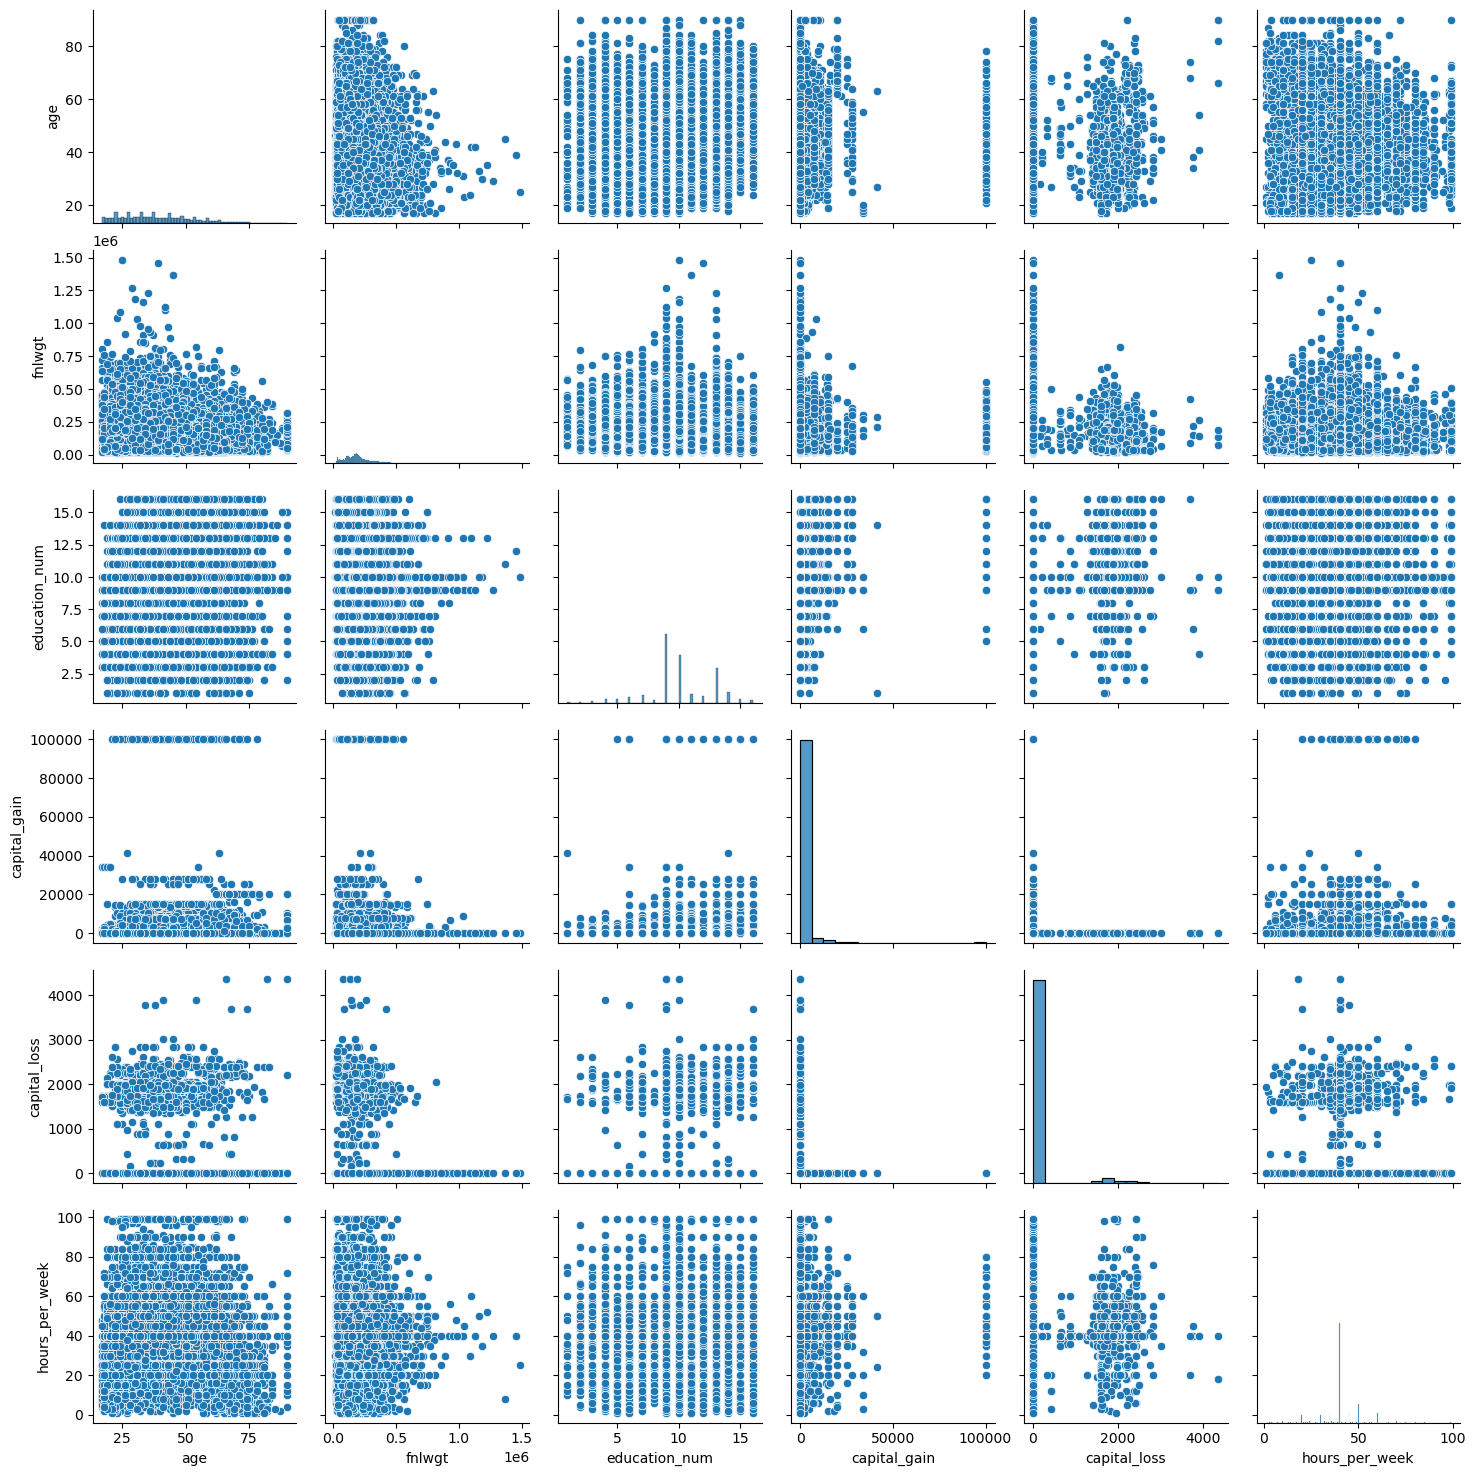

In [12]:
sns.pairplot(df_adult)
plt.show()

#### Statistical Summary of Numerical columns

In [13]:
statistical_summary =round(df_adult.describe(),2)
print(f'\nStatistical Summary of Numerical columns:\n',statistical_summary)


Statistical Summary of Numerical columns:
             age      fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.00    32537.00       32537.00      32537.00      32537.00   
mean      38.59   189780.85          10.08       1078.44         87.37   
std       13.64   105556.47           2.57       7387.96        403.10   
min       17.00    12285.00           1.00          0.00          0.00   
25%       28.00   117827.00           9.00          0.00          0.00   
50%       37.00   178356.00          10.00          0.00          0.00   
75%       48.00   236993.00          12.00          0.00          0.00   
max       90.00  1484705.00          16.00      99999.00       4356.00   

       hours_per_week  
count        32537.00  
mean            40.44  
std             12.35  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00  


#### Check and Handle Outliers

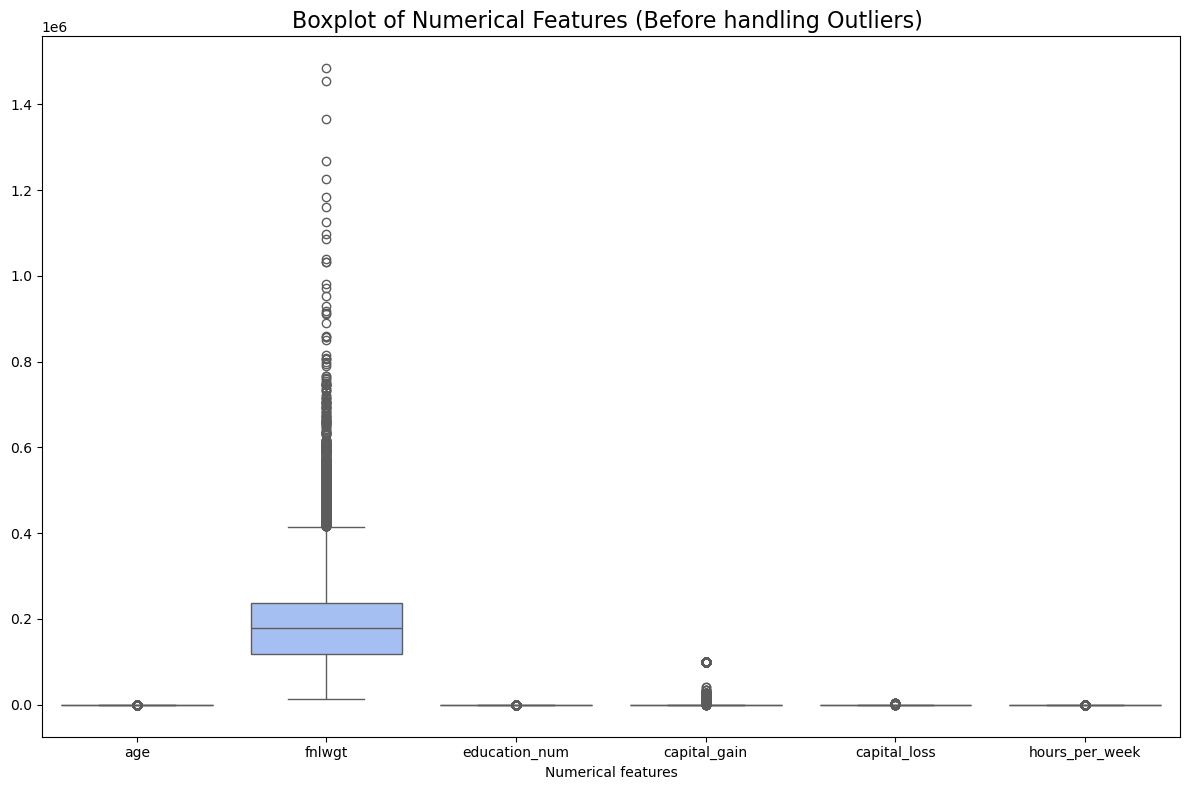

In [14]:
# first Visualize outlier throgh Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_adult, orient='v', palette='coolwarm')
plt.title("Boxplot of Numerical Features (Before handling Outliers) ", fontsize=16)
plt.xlabel("Numerical features")
plt.tight_layout()
plt.show()

In [15]:
Q1 = df_adult[num_col].quantile(0.25)
Q3 = df_adult[num_col].quantile(0.75)
IQR = Q3-Q1 # find Interquartile range

outlier_mask = (df_adult[num_col] < (Q1-1.5*IQR)) | (df_adult[num_col] > (Q3+1.5*IQR))
outlier_count = outlier_mask.sum().sort_values(ascending=False)
print('\n Outliers detection per columns:')
print(outlier_count)


 Outliers detection per columns:
hours_per_week    9002
capital_gain      2712
capital_loss      1519
education_num     1193
fnlwgt             993
age                142
dtype: int64


In [16]:
# Handle Outlier through winsorization method
for i in num_col:
    lower_limit = Q1[i] - 1.5*IQR[i]
    upper_limit = Q3[i] + 1.5*IQR[i]

    # cap the values instead of removing
    df_adult[i] = df_adult[i].clip(lower=lower_limit,upper=upper_limit)

In [17]:
# Recalculate to check any outliers remaining or not?
Q1_after = df_adult[num_col].quantile(0.25)
Q3_after = df_adult[num_col].quantile(0.75)
IQR_after = Q3_after - Q1_after

# Count how many outliers remain after treatment
outlier_mask_after = (df_adult[num_col] < (Q1_after - 1.5 * IQR_after)) | (df_adult[num_col] > (Q3_after + 1.5 * IQR_after))
outlier_counts_after = outlier_mask_after.sum()

print("\nOutliers remaining per column after Winsorization:")
print(outlier_counts_after)


Outliers remaining per column after Winsorization:
age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


In [18]:
# Check dtypes after handling outliers
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  int64   
 1   workclass       32537 non-null  category
 2   fnlwgt          32537 non-null  int64   
 3   education       32537 non-null  category
 4   education_num   32537 non-null  float64 
 5   marital_status  32537 non-null  category
 6   occupation      32537 non-null  category
 7   relationship    32537 non-null  category
 8   race            32537 non-null  category
 9   sex             32537 non-null  category
 10  capital_gain    32537 non-null  int64   
 11  capital_loss    32537 non-null  int64   
 12  hours_per_week  32537 non-null  float64 
 13  native_country  32537 non-null  category
 14  income          32537 non-null  category
dtypes: category(9), float64(2), int64(4)
memory usage: 2.0 MB


#### Correlation and heatmap 

In [19]:
# Check Correlation of numerical features
corr = df_adult[num_col].corr(numeric_only=True).fillna(0).round(3)
print(corr)

                  age  fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000  -0.077          0.047           0.0           0.0   
fnlwgt         -0.077   1.000         -0.040           0.0           0.0   
education_num   0.047  -0.040          1.000           0.0           0.0   
capital_gain    0.000   0.000          0.000           0.0           0.0   
capital_loss    0.000   0.000          0.000           0.0           0.0   
hours_per_week  0.091  -0.026          0.185           0.0           0.0   

                hours_per_week  
age                      0.091  
fnlwgt                  -0.026  
education_num            0.185  
capital_gain             0.000  
capital_loss             0.000  
hours_per_week           1.000  


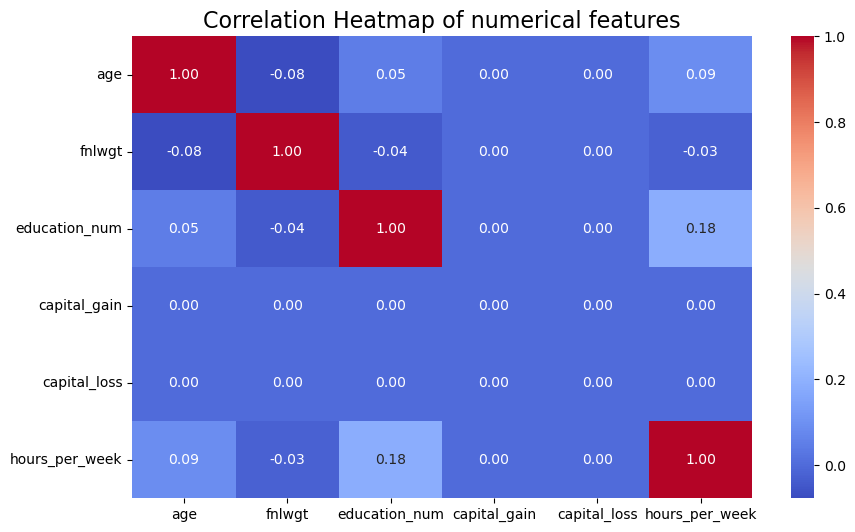

In [20]:
# Visualise Correlation throgh Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of numerical features',fontsize=16)
plt.show()

#### Statistical Summary for Categorical Columns

In [21]:
print('\nStatistical Summary of Categorical Columns:')
print(df_adult[cat_col].describe())


Statistical Summary of Categorical Columns:
       workclass education       marital_status       occupation relationship  \
count      32537     32537                32537            32537        32537   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22673     10494                14970             4136        13187   

          race    sex  native_country  income  
count    32537  32537           32537   32537  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27795  21775           29153   24698  


#### Visualisation of Categorical columns

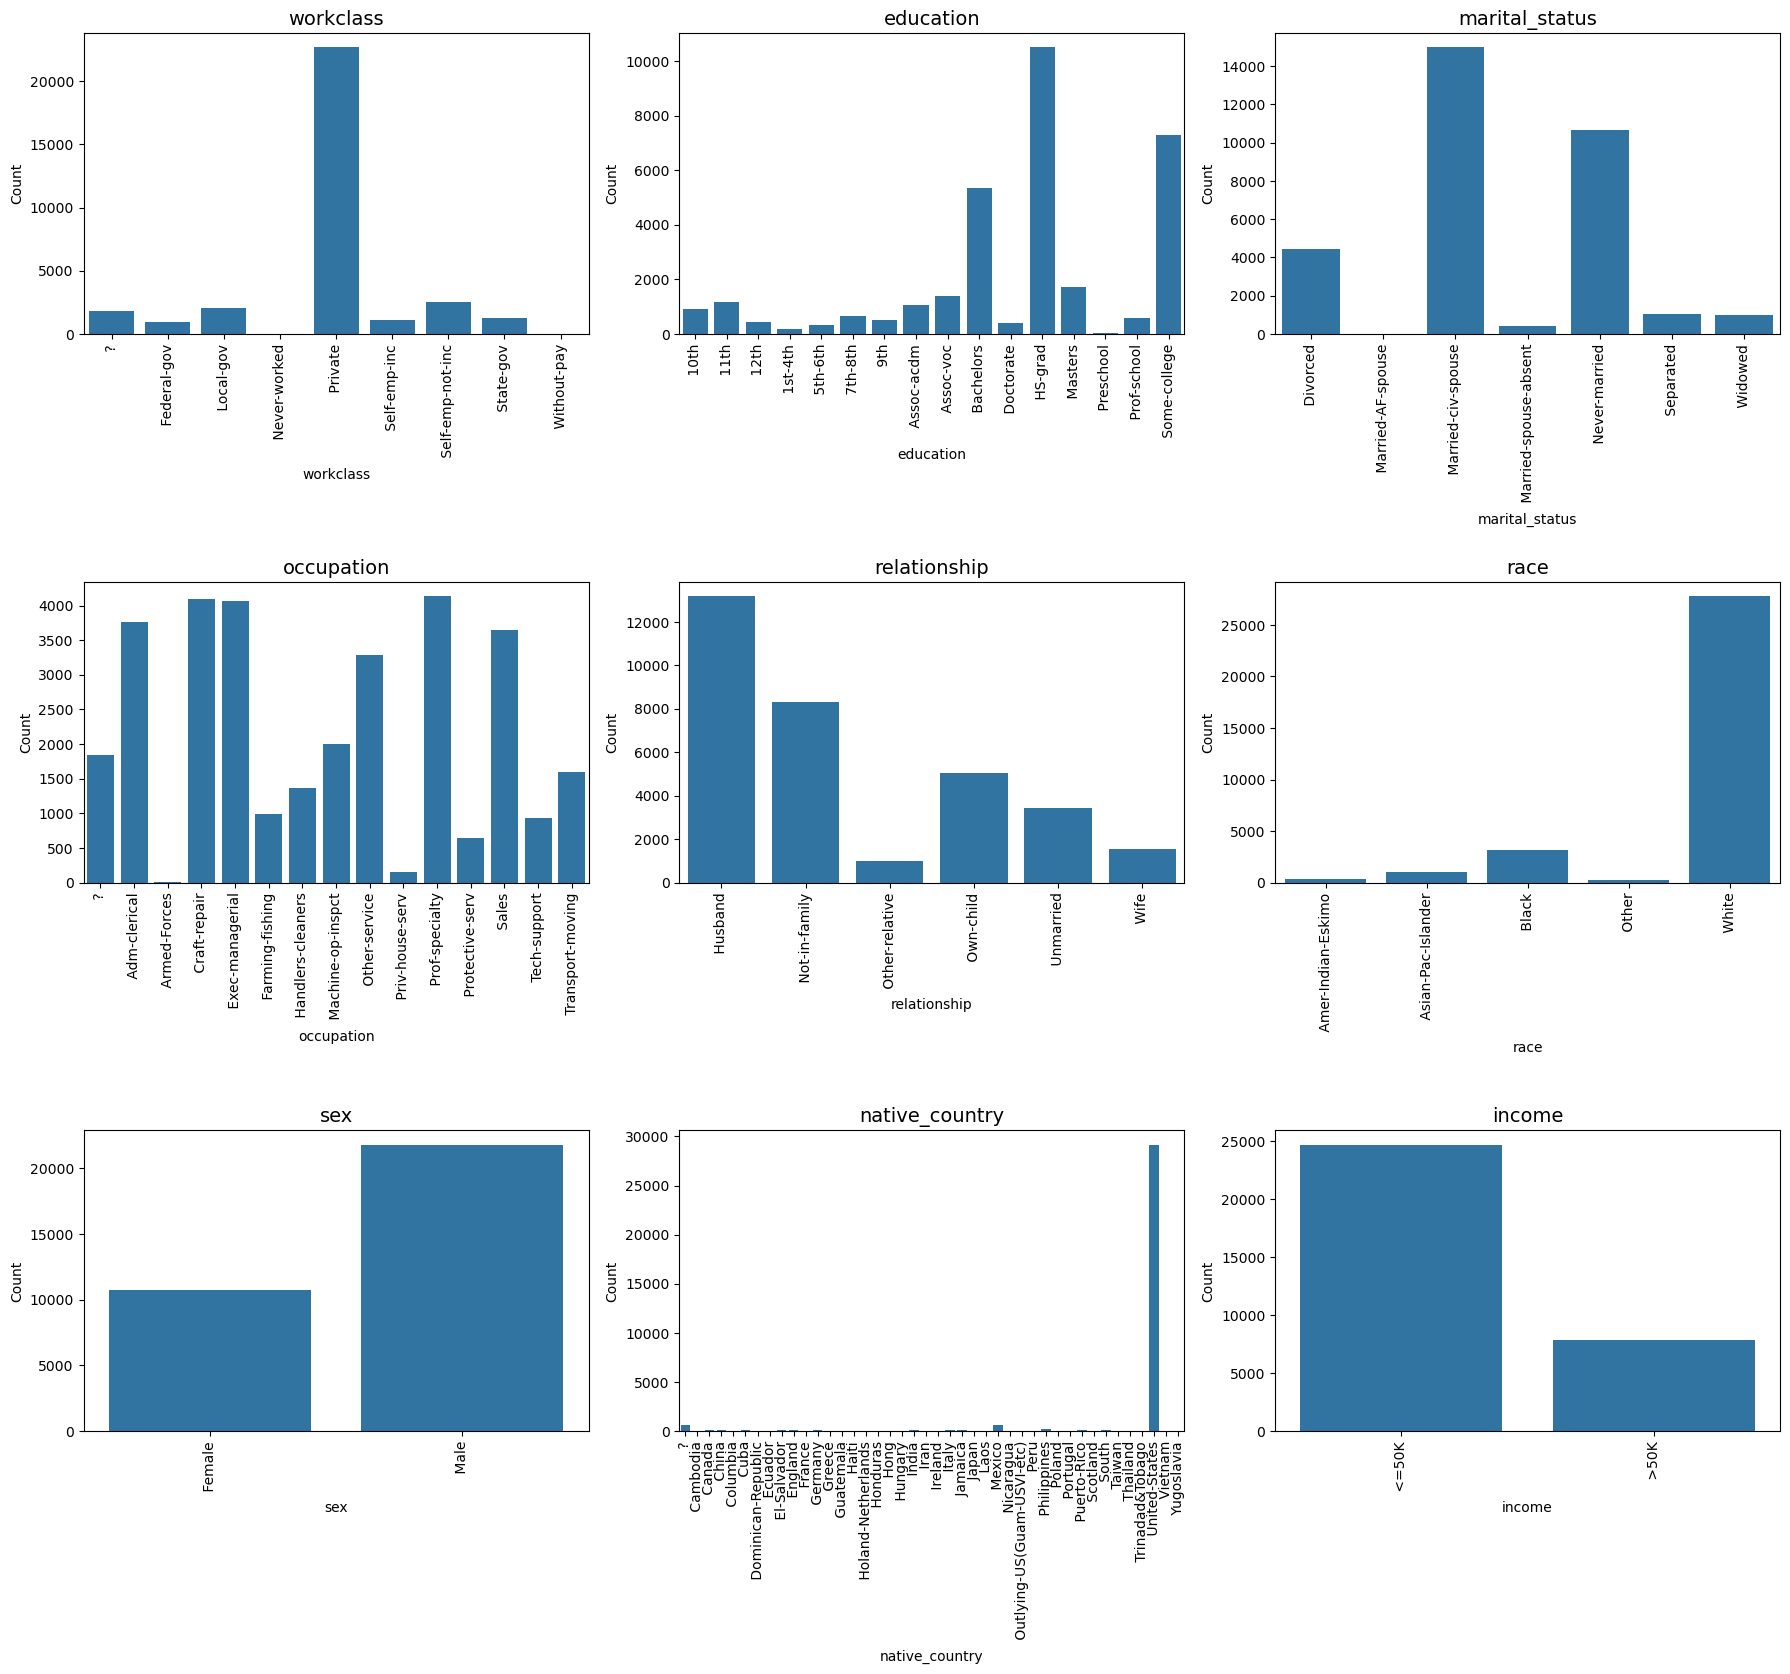

In [22]:
plt.figure(figsize=(18, 20))  
rows = 4
cols = 3

for i, col in enumerate(cat_col, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=df_adult[col])
    plt.title(col, fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)

# Adjust layout so titles/x-labels do not overlap
plt.tight_layout()
plt.show()

### Task-3 Feature Engineering:

### 3.1 Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

#### Feature - 1: Age_Group (age_group)

In [23]:
df_adult['age_group'] = pd.cut(df_adult['age'],bins=[0,25,45,65,100],labels=['young','mid_age','seniors','older'])

#### Feature - 2: Work Intensity (work_intensity)

In [24]:
df_adult['work_intensity']=pd.cut(df_adult['hours_per_week'],bins=[0,20,40,60,100],
                                  labels=['low_hours','normal_hours','high_horus','extreme_hours'])

### 3.2 Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [25]:
# Apply log1p transformation
df_adult['capital_gain_log'] = np.log1p(df_adult['capital_gain'])
df_adult['capital_loss_log'] = np.log1p(df_adult['capital_loss'])

#These two transformed columns will now have far less skewness, making it easier for the model to acquire information from.

#### Justification:

### 2. Encoding Techniques:

### 2.1 Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [26]:
# Re-identify categorical columns (now includes engineered categorical features)
cat_col = df_adult.select_dtypes(include=['category']).columns
print("\nCategorical columns after feature engineering:", cat_col.tolist())


Categorical columns after feature engineering: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income', 'age_group', 'work_intensity']


In [27]:
small_cat_col =[ i for i in cat_col if df_adult[i].nunique()<5]

In [28]:
print(f'Columns with less than5 categories:\n',small_cat_col)

Columns with less than5 categories:
 ['sex', 'income', 'age_group', 'work_intensity']


In [29]:
# Apply One-Hot encoding:
df_adult_ohe = pd.get_dummies(df_adult,columns=small_cat_col,drop_first=True)
df_adult_ohe = df_adult_ohe.astype({col: int for col in df_adult_ohe.select_dtypes(include='bool').columns})
df_adult_ohe.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,capital_gain_log,capital_loss_log,sex_ Male,income_ >50K,age_group_mid_age,age_group_seniors,age_group_older,work_intensity_normal_hours,work_intensity_high_horus,work_intensity_extreme_hours
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,0,...,0.0,0.0,1,0,1,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0.0,0.0,1,0,0,1,0,1,0,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0.0,0.0,1,0,1,0,0,1,0,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0.0,0.0,1,0,0,1,0,1,0,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,0.0,0.0,0,0,1,0,0,1,0,0


### 2.2 Use Label Encoding for categorical variables. Data Exploration and Preprocessing:

In [30]:
remaining_cat_col = df_adult_ohe.select_dtypes(include=['category']).columns
print("Columns with >= 5 categories (to Label Encode):\n", remaining_cat_col)

Columns with >= 5 categories (to Label Encode):
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'native_country'],
      dtype='object')


In [31]:
from sklearn.preprocessing import LabelEncoder
df_adult_le = df_adult_ohe.copy()
le = LabelEncoder()
for i in remaining_cat_col:
    df_adult_le[i] = le.fit_transform(df_adult_le[i])

print(df_adult_le.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9           13.0               4   
1   50          6   83311          9           13.0               2   
2   38          4  215646         11            9.0               0   
3   53          4  234721          1            7.0               2   
4   28          4  338409          9           13.0               2   

   occupation  relationship  race  capital_gain  ...  capital_gain_log  \
0           1             1     4             0  ...               0.0   
1           4             0     4             0  ...               0.0   
2           6             1     4             0  ...               0.0   
3           6             0     2             0  ...               0.0   
4          10             5     2             0  ...               0.0   

   capital_loss_log  sex_ Male  income_ >50K  age_group_mid_age  \
0               0.0          1             0                 

### 2.3 Discuss the pros and cons of One-Hot Encoding and Label Encoding.

### 1.One-Hot Encoding:

### 2. Label Encoding:

### Task-4 Feature Selection methods

In [32]:
# Identify target column after encoding
target_col = None
for col in df_adult_le.columns:
    if 'income' in col and '>50K' in col:
        target_col = col
        break

if target_col is None:
    target_col = 'income'
    df_adult_le[target_col] = LabelEncoder().fit_transform(df_adult_le[target_col])
print("\nTarget column for modeling:\n", target_col)



Target column for modeling:
 income_ >50K


### 4.1 Isolation Forest method

In [33]:
from sklearn.ensemble import IsolationForest
# Use all features EXCEPT the target for IsolationForest
X_if = df_adult_le.drop(columns=[target_col])

iso = IsolationForest(random_state=42, contamination=0.05)
iso.fit(X_if)

# Predict: 1 = inlier, -1 = outlier
outlier_labels = iso.predict(X_if)
print("\nIsolationForest output counts:", pd.Series(outlier_labels).value_counts())

# Keep only inliers for further analysis
mask_inliers = outlier_labels == 1
df_final = df_adult_le[mask_inliers].reset_index(drop=True)

print("Shape before IsolationForest:", df_adult_le.shape)
print("Shape after removing outliers:", df_final.shape)



IsolationForest output counts:  1    30910
-1     1627
Name: count, dtype: int64
Shape before IsolationForest: (32537, 23)
Shape after removing outliers: (30910, 23)


### 4.2 Matual Information Score
#### Remark:
"Because PPS could not be loaded on my machine, I substituted Mutual Information Score as an alternate nonlinear dependence measure. These approaches, like PPS, detect predicted correlations between features and the target and are commonly used in machine learning for feature selection."

In [34]:
from sklearn.feature_selection import mutual_info_classif
X = df_final.drop(columns=[target_col])
y = df_final[target_col]

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi_df = pd.DataFrame({
    'feature': X.columns,
    'mi_score': mi_scores
}).sort_values('mi_score', ascending=False)

print(mi_df)


                         feature  mi_score
7                   relationship  0.117630
5                 marital_status  0.113196
0                            age  0.074630
3                      education  0.066524
6                     occupation  0.065385
4                  education_num  0.064099
11                hours_per_week  0.045261
2                         fnlwgt  0.033593
20     work_intensity_high_horus  0.030265
19   work_intensity_normal_hours  0.029668
15                     sex_ Male  0.028484
1                      workclass  0.020891
17             age_group_seniors  0.017614
12                native_country  0.009088
8                           race  0.007970
9                   capital_gain  0.003618
18               age_group_older  0.002316
13              capital_gain_log  0.001127
10                  capital_loss  0.000000
14              capital_loss_log  0.000000
16             age_group_mid_age  0.000000
21  work_intensity_extreme_hours  0.000000


/var/folders/n5/wm5vjxt16hz4bnn13cm2g79r0000gn/T/ipykernel_57204/2231186490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df.head(10), x='mi_score', y='feature', palette='viridis')


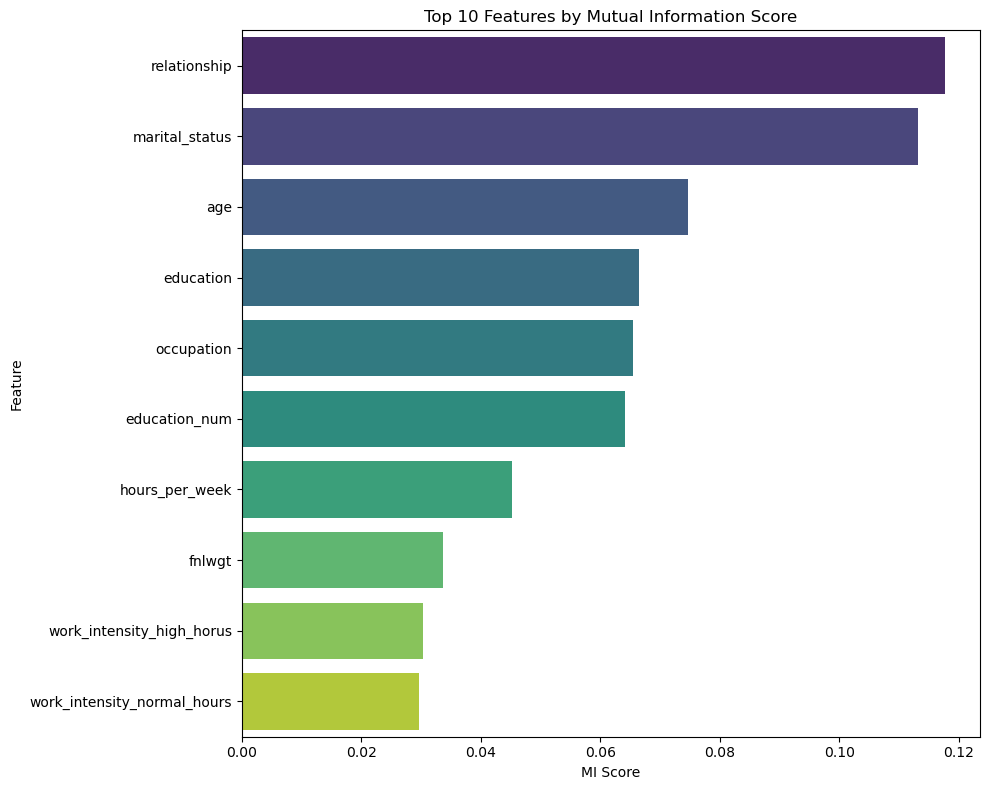

In [35]:
#Plot MI Feature Importance (optional)
plt.figure(figsize=(10, 8))
sns.barplot(data=mi_df.head(10), x='mi_score', y='feature', palette='viridis')
plt.title('Top 10 Features by Mutual Information Score')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Task-1 Apply scaling techniques to numerical features:

In [36]:
top_10_features = mi_df.sort_values(by='mi_score', ascending=False).head(10)['feature'].tolist()
top_10_features

['relationship',
 'marital_status',
 'age',
 'education',
 'occupation',
 'education_num',
 'hours_per_week',
 'fnlwgt',
 'work_intensity_high_horus',
 'work_intensity_normal_hours']

In [37]:
num_cols_final = df_final[top_10_features].select_dtypes(include=['int64','float64']).columns
num_cols_final

Index(['relationship', 'marital_status', 'age', 'education', 'occupation',
       'education_num', 'hours_per_week', 'fnlwgt',
       'work_intensity_high_horus', 'work_intensity_normal_hours'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#### a. Standard Scaler

In [39]:
scaler = StandardScaler()
df_final[num_cols_final] = scaler.fit_transform(df_final[num_cols_final])
print(f'Standard Scaler:\n',df_final[num_cols_final].head())

Standard Scaler:
    relationship  marital_status       age  education  occupation  \
0     -0.260424        0.965530  0.100938  -0.362553   -1.334999   
1     -0.889160       -0.403234  0.958204  -0.362553   -0.620733   
2     -0.260424       -1.771998  0.023004   0.162072   -0.144555   
3     -0.889160       -0.403234  1.192004  -2.461053   -0.144555   
4      2.254521       -0.403234 -0.756329  -0.362553    0.807799   

   education_num  hours_per_week    fnlwgt  work_intensity_high_horus  \
0       1.198261       -0.187738 -1.158175                  -0.629377   
1       1.198261       -1.422044 -1.096970                  -0.629377   
2      -0.485248       -0.187738  0.300709                  -0.629377   
3      -1.327002       -0.187738  0.502173                  -0.629377   
4       1.198261       -0.187738  1.597291                  -0.629377   

   work_intensity_normal_hours  
0                     0.629377  
1                     0.629377  
2                     0.629377  
3 

#### b. MinMax Scaler

In [40]:
mm_scaler = MinMaxScaler()
df_final_mm = df_final.copy()
df_final_mm[num_cols_final] = mm_scaler.fit_transform(df_final_mm[num_cols_final])
print(f'Min-Max Scaling:\n',df_final_mm[num_cols_final].head())

Min-Max Scaling:
    relationship  marital_status       age  education  occupation  \
0           0.2        0.666667  0.360656   0.600000    0.071429   
1           0.0        0.333333  0.540984   0.600000    0.285714   
2           0.2        0.000000  0.344262   0.733333    0.428571   
3           0.0        0.333333  0.590164   0.066667    0.428571   
4           1.0        0.333333  0.180328   0.600000    0.714286   

   education_num  hours_per_week    fnlwgt  work_intensity_high_horus  \
0       0.739130           0.375  0.158585                        0.0   
1       0.739130           0.000  0.173002                        0.0   
2       0.391304           0.375  0.502215                        0.0   
3       0.217391           0.375  0.549669                        0.0   
4       0.739130           0.375  0.807616                        0.0   

   work_intensity_normal_hours  
0                          1.0  
1                          1.0  
2                          1.0  
3 

### Discuss the scenarios where each scaling technique is preferred and why.

#### a. Standard Scaling:

#### b. Min-Max Scaling:

### Build Model and evaluate result

In [44]:
X = df_final[top_10_features]
y = df_final[target_col]

In [61]:
y.value_counts()

income_ >50K
0    23419
1     7491
Name: count, dtype: int64

Training class distribution BEFORE balancing:
income_ >50K
0    18735
1     5993
Name: count, dtype: int64

Test class distribution:
income_ >50K
0    4684
1    1498
Name: count, dtype: int64

Training class distribution AFTER SMOTE:
income_ >50K
0    18735
1    18735
Name: count, dtype: int64

Running Grid Search for All Models


 Logistic Regression Results
Best Score: 0.7500400320256204
Best Params: {'C': 0.01, 'solver': 'liblinear'}

 Random Forest Results
Best Score: 0.8669335468374699
Best Params: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}

 XGBoost Results
Best Score: 0.8733653589538297
Best Params: {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 200, 'subsample': 0.7}

 Model Comparison 
Logistic Regression: 0.7500400320256204
Random Forest: 0.8669335468374699
XGBoost: 0.8733653589538297

 Best Model Selected: XGBoost


 Classification Report

              precision    recall  f1-score   support

           0       0.89      0

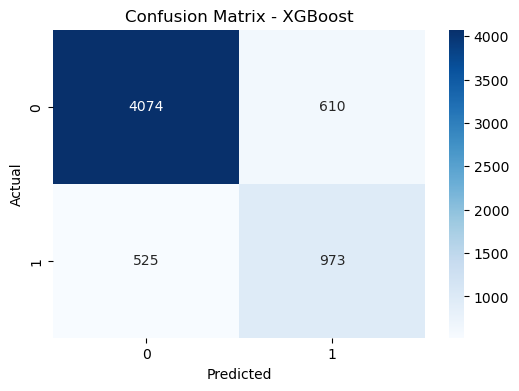


Final Test Accuracy: 0.8164024587512132


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training class distribution BEFORE balancing:")
print(y_train.value_counts())
print("\nTest class distribution:")
print(y_test.value_counts())

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("\nTraining class distribution AFTER SMOTE:")
print(y_train_bal.value_counts())


models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },

    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [200,250,300],
            'max_depth': [30, 40],
            'min_samples_split': [4, 9],
            'min_samples_leaf': [3, 5]
        }
    },

    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', random_state=42),
        "params": {
            'n_estimators': [200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [7, 9, 11],
            'subsample': [0.7, 1]
        }
    }
}


best_models = {}
print("\nRunning Grid Search for All Models\n")

for name, mp in models.items():
    grid = GridSearchCV(
        mp["model"],
        mp["params"],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train_bal, y_train_bal)

    best_models[name] = {
        "best_estimator": grid.best_estimator_,
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    }

    print(f"\n {name} Results")
    print("Best Score:", grid.best_score_)
    print("Best Params:", grid.best_params_)


print("\n Model Comparison ")
for m, info in best_models.items():
    print(f"{m}: {info['best_score']}")

best_model_name = max(best_models, key=lambda m: best_models[m]['best_score'])
best_model = best_models[best_model_name]['best_estimator']

print(f"\n Best Model Selected: {best_model_name}\n")


# 6) FINAL EVALUATION ON TEST SET

Y_pred = best_model.predict(X_test)

print("\n Classification Report\n")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
acc = accuracy_score(Y_test, Y_pred)
print("\nFinal Test Accuracy:", acc)
